In [1]:
# import pandas and the hilo foot traffic data
import pandas as pd
hilo_foot_traffic = pd.read_parquet('hilo_full_patterns.parquet')

In [2]:
# check all the columns
hilo_foot_traffic.columns

Index(['placekey', 'safegraph_place_id', 'parent_placekey',
       'parent_safegraph_place_id', 'location_name', 'safegraph_brand_ids',
       'brands', 'top_category', 'sub_category', 'category_tags', 'naics_code',
       'latitude', 'longitude', 'street_address', 'city', 'region',
       'postal_code', 'iso_country_code', 'phone_number', 'open_hours',
       'opened_on', 'closed_on', 'tracking_opened_since',
       'tracking_closed_since', 'date_range_start', 'date_range_end',
       'raw_visit_counts', 'raw_visitor_counts', 'visits_by_day',
       'visitor_home_cbgs', 'visitor_country_of_origin', 'distance_from_home',
       'median_dwell', 'bucketed_dwell_times', 'related_same_day_brand',
       'related_same_month_brand', 'popularity_by_hour', 'popularity_by_day',
       'device_type', 'poi_cbg', 'visitor_daytime_cbgs'],
      dtype='object')

In [3]:
# import the rest of the libraries necessary
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as cx
import warnings
warnings.filterwarnings("ignore")

In [7]:
hilo_foot_traffic.reset_index(drop=True, inplace=True)

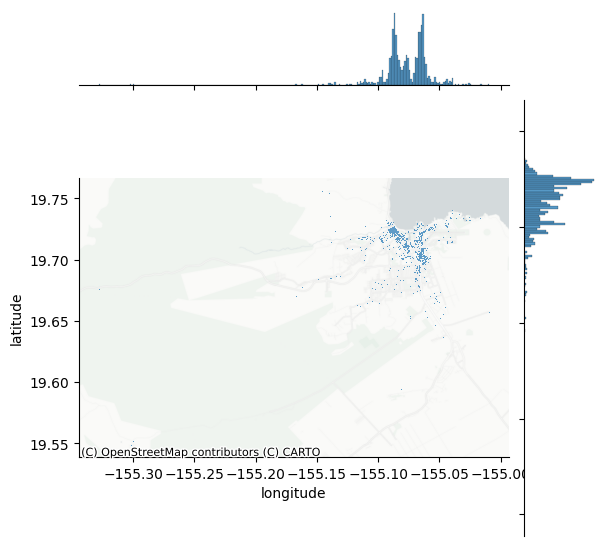

In [58]:
# First joing axes plot with longitude and latitude on the x and y axes respectively

joint_axes = sns.jointplot(x="longitude", y="latitude", data=hilo_foot_traffic, s=0.5)

cx.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.PositronNoLabels
)

plt.show()

Above graph is a good start but doesn't take into consideration the density of different locations as each point in the dataset has its own unique raw foot traffic patterns.

In [9]:
# Output top 20 locations by raw visit count in Hilo
hilo_foot_traffic.sort_values(by='raw_visit_counts', ascending=False)['location_name'].unique()[:20]

array(['Waiakea Center', 'Hilo International Airport',
       'Prince Kuhio Plaza', 'Walmart', 'Target',
       'University Of Hawaii At Hilo', 'Hilo Medical Center',
       'The Home Depot', 'CVS', 'Kta Puainako Pharmacy',
       'Pizza Hawaii of Hilo', 'Afook Chinen Civic Auditorium',
       'Hilo Shopping Center', 'Edwin H Mookini Library', 'Ross Stores',
       'Wailoa River State Recreation Area', 'Safeway',
       'Kawamoto Swim Stadium', 'Naniloa Volcanoes Resort',
       'Hilo Municipal Golf Course'], dtype=object)

In [10]:
# Use date range start to extract month
hilo_foot_traffic['month'] = hilo_foot_traffic['date_range_start'].str[5:7].astype("Int64")

In [11]:
# Create dataset for each season
hilo_winter = hilo_foot_traffic[hilo_foot_traffic['month'] < 4]
hilo_spring = hilo_foot_traffic[(hilo_foot_traffic['month'] > 3) & (hilo_foot_traffic['month'] < 7 )]
hilo_summer = hilo_foot_traffic[(hilo_foot_traffic['month'] > 6) & (hilo_foot_traffic['month'] < 10 )]
hilo_fall = hilo_foot_traffic[hilo_foot_traffic['month'] > 9]

Now, I'll be repeated the above analysis of outputting the top 20 locations by raw visit counts but with each season of the year.

In [12]:
hilo_winter.sort_values(by='raw_visit_counts', ascending=False)['location_name'].unique()[:20]

array(['Waiakea Center', 'Hilo International Airport', 'Walmart',
       'Prince Kuhio Plaza', 'Target', 'University Of Hawaii At Hilo',
       'Hilo Medical Center', 'The Home Depot', 'Kta Puainako Pharmacy',
       'CVS', 'Pizza Hawaii of Hilo', 'Hilo Shopping Center',
       'Wailoa River State Recreation Area', 'Hilo Municipal Golf Course',
       'Hilo High School', 'Connections New Century Pcs', 'Hualani Park',
       'Afook Chinen Civic Auditorium', 'Edwin H Mookini Library',
       'Beltone'], dtype=object)

In [13]:
hilo_spring.sort_values(by='raw_visit_counts', ascending=False)['location_name'].unique()[:20]

array(['Waiakea Center', 'Hilo International Airport',
       'Prince Kuhio Plaza', 'Walmart', 'Target',
       'University Of Hawaii At Hilo', 'Hilo Medical Center',
       'The Home Depot', 'Kta Puainako Pharmacy', 'CVS',
       'Pizza Hawaii of Hilo', 'Hilo Shopping Center', 'Safeway',
       'Wailoa River State Recreation Area', 'Kawamoto Swim Stadium',
       'Afook Chinen Civic Auditorium', 'Naniloa Volcanoes Resort',
       'Ross Stores', 'Hilo High School', 'Hilo Municipal Golf Course'],
      dtype=object)

In [14]:
hilo_summer.sort_values(by='raw_visit_counts', ascending=False)['location_name'].unique()[:20]

array(['Waiakea Center', 'Hilo International Airport',
       'Prince Kuhio Plaza', 'Walmart', 'Target',
       'University Of Hawaii At Hilo', 'Hilo Medical Center',
       'The Home Depot', 'Kta Puainako Pharmacy', 'CVS',
       'Pizza Hawaii of Hilo', 'Afook Chinen Civic Auditorium',
       'Edwin H Mookini Library', 'Hilo Shopping Center',
       'Wailoa River State Recreation Area', 'Safeway',
       'Naniloa Volcanoes Resort', 'Hilo High School', 'Ross Stores',
       'Liliuokalani Park And Gardens'], dtype=object)

In [15]:
hilo_fall.sort_values(by='raw_visit_counts', ascending=False)['location_name'].unique()[:20]

array(['Waiakea Center', 'Hilo International Airport',
       'Prince Kuhio Plaza', 'Walmart', 'Target',
       'University Of Hawaii At Hilo', 'Hilo Medical Center',
       'The Home Depot', 'CVS', 'Kta Puainako Pharmacy',
       'Pizza Hawaii of Hilo', 'Hilo Shopping Center',
       'Edwin H Mookini Library', 'Ross Stores',
       'Wailoa River State Recreation Area', 'Hilo High School',
       'Hualani Park', 'Hilo Municipal Golf Course', 'Safeway', 'Beltone'],
      dtype=object)

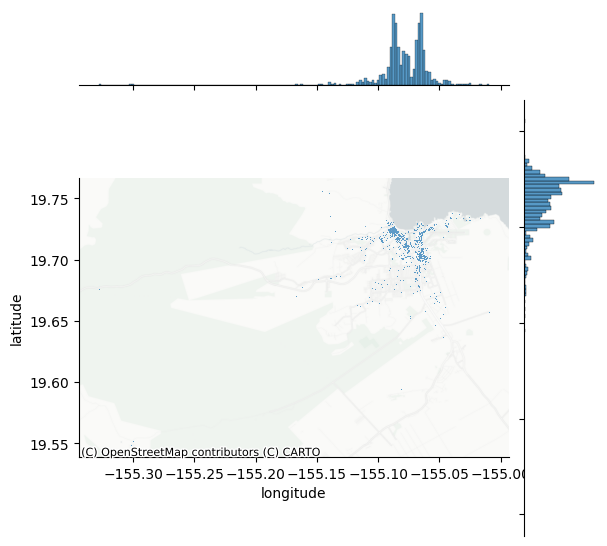

In [16]:
# Original graph again but for the winter (could be repeated for all seasons but the graph isn't ideal yet)
joint_axes = sns.jointplot(x="longitude", y="latitude", data=hilo_winter, s=0.5)
cx.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.PositronNoLabels,
)
plt.show()

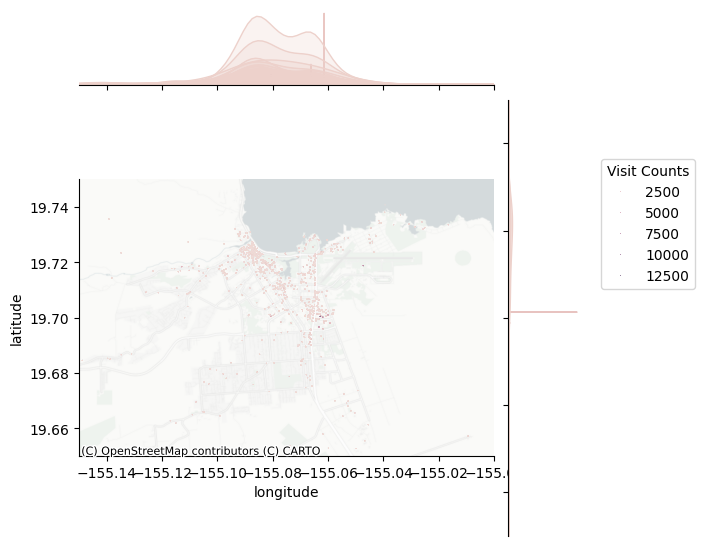

In [17]:
# Now using hue to adjust the color of each point and the histograms on both axes based on raw visit count.
# Also zooming in to see the important areas of the graph more clearly

joint_axes = sns.jointplot(x="longitude", y="latitude", hue="raw_visit_counts", xlim=(-155.15, -155), ylim=(19.65, 19.75), data=hilo_foot_traffic, s=0.5)

cx.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.PositronNoLabels
)

joint_axes.ax_joint.legend(bbox_to_anchor=(1.5, 1.1), title = "Visit Counts")
plt.show()

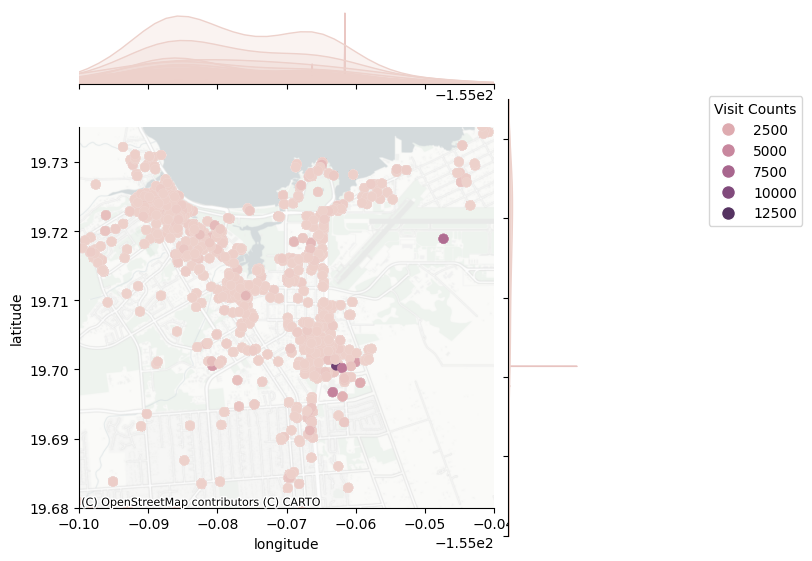

In [31]:
# Moving the legend farther off and increasing the size of the points for visibility.
# Increasing size of points within graph for visibility
# Also further refining the range

from matplotlib.lines import Line2D

joint_axes = sns.jointplot(x="longitude", y="latitude", hue="raw_visit_counts", xlim=(-155.1, -155.04), ylim=(19.68, 19.735), data=hilo_foot_traffic, s=0.5)

cx.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.PositronNoLabels
)

# Adjust point sizes in the legend
handles, labels = joint_axes.ax_joint.get_legend_handles_labels()

# Extract colors from existing legend handles
legend_colors = [handle.get_color() for handle in handles]

# Create custom legend handles with both color and size
legend_handles = [Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color) for color in legend_colors]

# Add legend with custom handles
joint_axes.ax_joint.legend(legend_handles, labels, bbox_to_anchor=(1.5, 1.1), title="Visit Counts")

# Increases size of points in the graph
joint_axes.ax_joint.collections[0].set_sizes([50])

plt.show()

Although this graph accomplishes the original goal, as it is right now with fixed limiters to zoom in on important areas, this isn't refinable into a specific function that can be universally used on other sets of data. I'll try to repeat this analysis on a seperate dataset to see what is generalizable to facilitate future function creation.

In [54]:
ann_arbor_foot_traffic = pd.read_parquet('ann_arbor.parquet')

In [33]:
ann_arbor_foot_traffic.reset_index(drop=True, inplace=True)

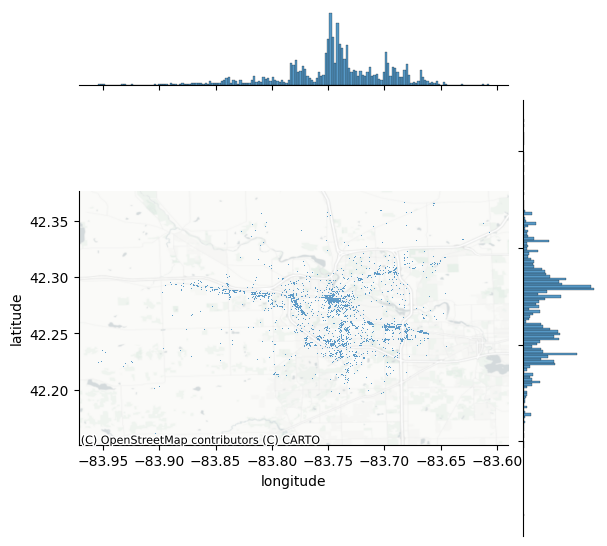

In [34]:
# First joing axes plot with longitude and latitude on the x and y axes respectively

joint_axes = sns.jointplot(x="longitude", y="latitude", data=ann_arbor_foot_traffic, s=0.5)

cx.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.PositronNoLabels
)

plt.show()

In [49]:
# Output top 20 locations by raw visit count in Ann Arbor
ann_arbor_foot_traffic.sort_values(by='raw_visit_counts', ascending=False)['location_name'].unique()[:20]

array(['Bromley Park', 'Douglas Park', 'Plymouth Road Mall',
       'St Joseph Mercy Hospital', 'Briarwood Mall',
       'University of Michigan', 'Academic Dermatology Associates',
       'Washtenaw Community College Bookstore',
       'Westgate Shopping Center', "C S Mott Children's Hospital",
       'Shell Oil', 'Veterans Memorial Park', 'Pittsfield Place',
       'Arborland Center', 'Maple Village',
       'Cancer Center Ambulatory Pharmacy',
       'Univ Of Mi Dialysis Pediatric', 'Och Fitness Center',
       'Michigan Stadium', "Macy's"], dtype=object)

In [36]:
# Use date range start to extract month
ann_arbor_foot_traffic['month'] = ann_arbor_foot_traffic['date_range_start'].str[5:7].astype("Int64")

In [37]:
# Create dataset for each season
ann_arbor_winter = ann_arbor_foot_traffic[ann_arbor_foot_traffic['month'] < 4]
ann_arbor_spring = ann_arbor_foot_traffic[(ann_arbor_foot_traffic['month'] > 3) & (ann_arbor_foot_traffic['month'] < 7 )]
ann_arbor_summer = ann_arbor_foot_traffic[(ann_arbor_foot_traffic['month'] > 6) & (ann_arbor_foot_traffic['month'] < 10 )]
ann_arbor_fall = ann_arbor_foot_traffic[ann_arbor_foot_traffic['month'] > 9]

In [38]:
# Try out top 20 in the winter
ann_arbor_winter.sort_values(by='raw_visit_counts', ascending=False)['location_name'].unique()[:20]

array(['Plymouth Road Mall', 'St Joseph Mercy Hospital', 'Briarwood Mall',
       'Academic Dermatology Associates', 'Westgate Shopping Center',
       'Veterans Memorial Park', "C S Mott Children's Hospital",
       'University of Michigan', 'Pittsfield Place', 'Shell Oil',
       'Cancer Center Ambulatory Pharmacy', 'Arborland Center',
       'Univ Of Mi Dialysis Pediatric',
       'Washtenaw Community College Bookstore', 'Crisler Center',
       'Och Fitness Center', 'Seva Restaurant', 'Maple Village',
       'Va Medical Center Ann Arbor', "Macy's"], dtype=object)

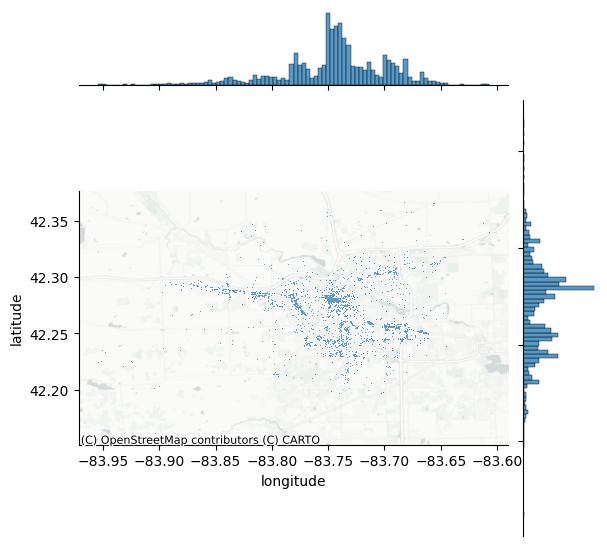

In [40]:
# Original graph again but for the winter (could be repeated for all seasons but the graph isn't ideal yet)
joint_axes = sns.jointplot(x="longitude", y="latitude", data=ann_arbor_winter, s=0.5)
cx.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.PositronNoLabels,
)
plt.show()

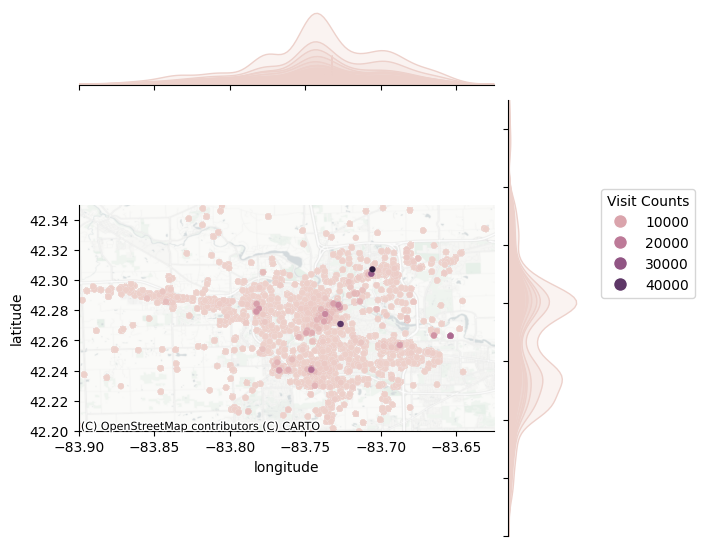

In [57]:
# Skip to final version of Hilo map but with Ann Arbor

ann_arbor_foot_traffic_sorted = ann_arbor_foot_traffic.sort_values(by='raw_visit_counts', ascending=True)
ann_arbor_foot_traffic_sorted.reset_index(drop=True, inplace=True)

joint_axes = sns.jointplot(x="longitude", y="latitude", hue="raw_visit_counts", xlim=(-83.90, -83.625), ylim=(42.20, 42.35), data=ann_arbor_foot_traffic_sorted, s=0.5)

cx.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.PositronNoLabels
)

# Adjust point sizes in the legend
handles, labels = joint_axes.ax_joint.get_legend_handles_labels()

# Extract colors from existing legend handles
legend_colors = [handle.get_color() for handle in handles]

# Create custom legend handles with both color and size
legend_handles = [Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color) for color in legend_colors]

# Add legend with custom handles
joint_axes.ax_joint.legend(legend_handles, labels, bbox_to_anchor=(1.5, 1.1), title="Visit Counts")

# Increases size of points in the graph
joint_axes.ax_joint.collections[0].set_sizes([20])

plt.show()

I realized while trying to build this map that the places with high visit counts even with the hue aren't necessarily visible as they're hidden below a bevy of relatively unicolor points. If you sort the dataframe first though by ascending visit counts then the places with large visit counts will pop in the graph. Going to quickly apply this to Hilo as well.

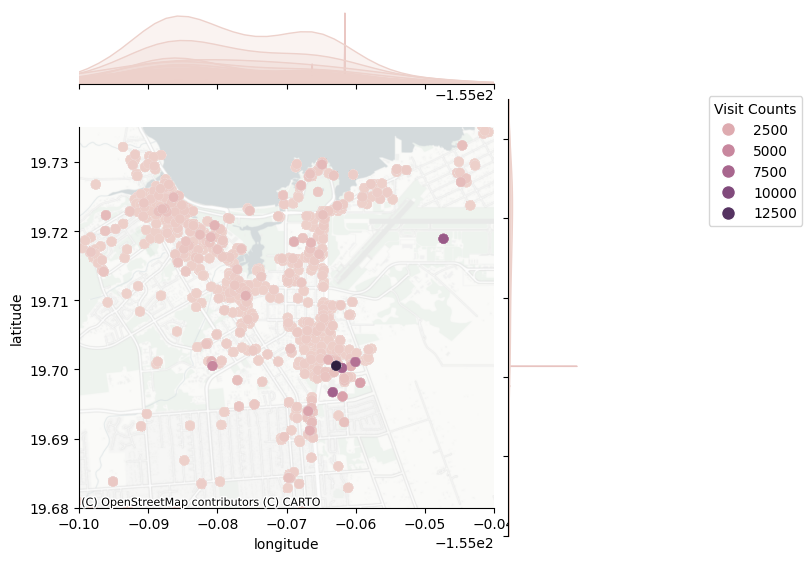

In [59]:
hilo_foot_traffic_sorted = hilo_foot_traffic.sort_values(by='raw_visit_counts', ascending=True)
hilo_foot_traffic_sorted.reset_index(drop=True, inplace=True)

joint_axes = sns.jointplot(x="longitude", y="latitude", hue="raw_visit_counts", xlim=(-155.1, -155.04), ylim=(19.68, 19.735), data=hilo_foot_traffic_sorted, s=0.5)

cx.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.PositronNoLabels
)

# Adjust point sizes in the legend
handles, labels = joint_axes.ax_joint.get_legend_handles_labels()

# Extract colors from existing legend handles
legend_colors = [handle.get_color() for handle in handles]

# Create custom legend handles with both color and size
legend_handles = [Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color) for color in legend_colors]

# Add legend with custom handles
joint_axes.ax_joint.legend(legend_handles, labels, bbox_to_anchor=(1.5, 1.1), title="Visit Counts")

# Increases size of points in the graph
joint_axes.ax_joint.collections[0].set_sizes([50])

plt.show()